In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("/Users/mufseeramusthafa/Documents/machine_learning/airquality_index_predicton/Data/Real-Data/\
Real_Combine.csv")

In [5]:
df.dtypes

T         float64
TM        float64
Tm        float64
SLP       float64
H         float64
VV        float64
V         float64
VM        float64
PM 2.5    float64
dtype: object

In [6]:
df.isna().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

## Feature importance

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [10]:
model.feature_importances_

array([0.17697144, 0.08031052, 0.18763131, 0.18832717, 0.08694164,
       0.18651269, 0.05204508, 0.04126015])

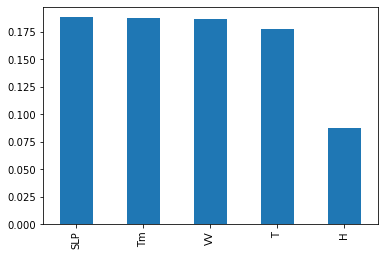

In [13]:
feature_importance=pd.Series(model.feature_importances_,x.columns)
feature_importance.nlargest(5).plot(kind="bar")
plt.show()

## Decision tree Regressor

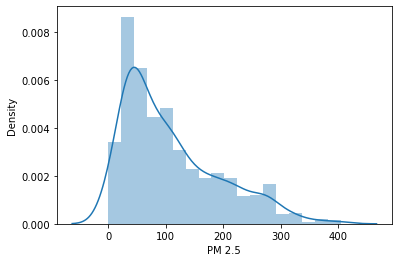

In [15]:
sns.distplot(y)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [21]:
from sklearn.tree import DecisionTreeRegressor
decision_model=DecisionTreeRegressor(criterion="mse")

In [22]:
decision_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [23]:
print("coeficint of determination r^2 on train:{}".format(decision_model.score(x_train,y_train)) )

coeficint of determination r^2 on train:1.0


In [36]:
print("coefient of determination r^2 on test:{}".format(decision_model.score(x_test,y_test)))

coefient of determination r^2 on test:0.7447330912583445


In [26]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(decision_model,x,y,cv=5)

In [27]:
print(score.mean())

0.5392806805544822


## Tree visualisation

In [29]:
from sklearn.tree import export_graphviz
export_graphviz(decision_model,out_file="tree_vehoicles.dot",feature_names=x.columns)

In [44]:
import pydot

(graph,) = pydot.graph_from_dot_file("/Users/mufseeramusthafa/Documents/machine_learning/airquality_index_predicton/tree_vehoicles.dot")
graph.write_png("tree_vehoicles.png")

In [31]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.


### model evaluation

In [37]:
prediction=decision_model.predict(x_test)

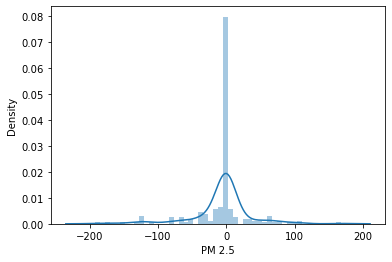

In [39]:
sns.distplot(y_test-prediction)
plt.show()

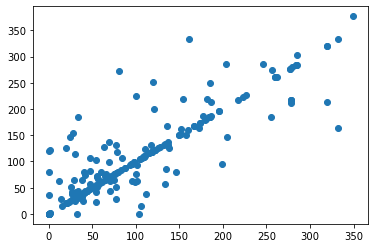

In [41]:
plt.scatter(y_test,prediction)
plt.show()

### Hyperparameter tuning Decision Tree Regressor

In [42]:
# hyperparameter optimisation
params={
    "splitter":["best","random"],
    "max_depth":[3,5,7,9,12,13,10],
    "min_samples_leaf":[1,2,3,4,5],
    "min_weight_fraction_leaf":[.1,.2,.3,.5],
    "max_features":["auto","log2",None,"sqrt"],
    "max_leaf_nodes":[None,10,20,30,40,23]
}

In [43]:
# hyperparameter optimisation using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [49]:
grid_search=GridSearchCV(decision_model,param_grid=params,cv=10,n_jobs=-1,scoring="neg_mean_squared_error",verbose=3)

In [50]:
 grid_search.fit(x,y)

Fitting 10 folds for each of 6720 candidates, totalling 67200 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 12, 13, 10],
                         'max_features': ['auto', 'log2', None, 'sqrt'],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 23],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.5],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [51]:
grid_search.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [53]:
grid_search.best_score_

-3131.6489619178874

In [54]:
prediction=grid_search.predict(x_test)

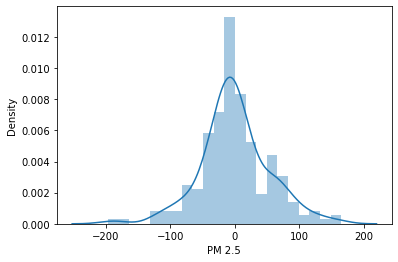

In [57]:
sns.distplot(y_test-prediction)
plt.show()

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [59]:
print("MAE :",mean_absolute_error(y_test,prediction))
print("MSE :",mean_squared_error(y_test,prediction))

MAE : 38.99445118764953
MSE : 2880.524880221544


In [ ]:
import pickle
file=open("decision_")